
<a id="overview"></a>

# Exploring Walmart Sales Data


## Overview
In this assignment, you will work with sample Walmart data looking at weekly sales in order to project sales for different departments in each store. One of the biggest challenges is the fact that we have limited data. Your task will be to import raw data, clean the data, and structure your insights by looking at historical sales data from nearly 50 Walmart stores around the United States (and in every store, there are multiple departments).


**Expected Time to complete: 4-8 hours**

## Objectives

This assignment will provide you with a chance to:

- Read/write CSV files using Python's `pandas` module.
- Apply basic pandas functionality like `merge`, `cut`, filtering, etc.
- Practice graphing trends to ascertain insights from them.
- Clean and structure Walmart sales data in order to forecast demand.


## Problem

Your job is to project sales for each department in every store. Easy, right? You'll be answering questions, such as:

- What are the average weekly sales by region?
- Is there a correlation between fuel price and sales?


## Structure

This notebook walks through Pythonic data analysis in different stages: 

- **Required:** This section covers classroom topics from recent units. These are _required_. 
- **Advanced:** This section covers upcoming topics. These are _optional_.

Throughout the notebook, you will see clearly labeled sections._You must provide answers to all of the questions in the **Required** section._ Some questions have been further divided up into "Part 1", "Part 2", (etc) in order to break down the steps of sequential logic used in Python programming. Please attempt answers for all parts.

For those of you who wish to work ahead or want to come back later for more practice, the **Advanced** section offers additional prompts that will extend your analysis. This section is optional; you do not need to complete these for submission; however, depending on the discretion of your section instructor, these questions may be completed for bonus points.


## Instructions

1. Open the assignment notebook. 
1. Save a copy of your notebook and retitle it: "yourname_assignment.ipynb"
1. Attempt answers for all **Required questions**. Some questions can be solved in many different ways!
1. Include at least one comment per question explaining your logic or approach. To include a comment in your Python code, use the `#` sign.
1. Make sure to include all work within your Jupyter notebook.
1. Submit answers for the **Required questions** to your instructional team by the due date.
1. Have fun!


## Data
Our data has been sampled from an [open-source project hosted by Walmart on Kaggle.com](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/overview). When you click into the data folder, you'll see several files:

Within `train.csv` we have:
- Store - the store number
- Dept - the department number
- Date - the week
- `Weekly_Sales` -  sales for the given department in the given store
- `IsHoliday` - whether the week is a special holiday week

in `stores.csv` we have data related to specific stores, departments, and regional activity for the given dates:

- Store - the store number
- Date - the week
- Size - size of the store

in `features.csv` we have data related to specific stores, departments, and regional activity for the given dates:

- Store - the store number
- Date - the week
- Temperature - average temperature in the region
- `Fuel_Pric`e - cost of fuel in the region
- `MarkDown1-5` - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only - available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- CPI - the consumer price index
- Unemployment - the unemployment rate
- `IsHoliday` - whether the week is a special holiday week

in `test.csv` we have a sample of weeks that we can attempt to forecast weekly sales for (and then test our prediction using Mean Squared Error).

---

### Setting up our Environment

In [1]:
# Import the requisite packages
# Pandas for data manipulation
import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None

In [2]:
# Now let's read in the **Training** data and take a look at the first few rows
train = pd.read_csv("data/train.csv")
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
# Next, read in the **Features** data and take a look at the first few rows
features = pd.read_csv("data/features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [4]:
# Finally, read in the **Stores** data and inspect the first few rows
stores = pd.read_csv("data/stores.csv")
stores.head()


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Inspecting the first 5 rows of the "train", "features", and "stores" data reveals "Store" as a common attribute among all data frames.  "Date" is also a common attribute between the "train" and "features" data sets.

Let's explore how these attributes are similar or different to determine how to merge the data frames.

In [5]:
# Inspect the shape or dimensions of each data set.
print(train.shape)
print(features.shape)
print(stores.shape)

(421570, 5)
(8190, 12)
(45, 3)


In [6]:
# Check min and max of each data frame's "Store" column
print(f'train Store min = {train["Store"].min()} and max = {train["Store"].max()}')
print(f'feature Store min = {features["Store"].min()} and max = {features["Store"].max()}')
print(f'stores Store min = {stores["Store"].min()} and max = {stores["Store"].max()}')

train Store min = 1 and max = 45
feature Store min = 1 and max = 45
stores Store min = 1 and max = 45


In [7]:
# Check min and max of train and features "Date" columns. 
print(f'train Date min = {train["Date"].min()} and max = {train["Date"].max()}')
print(f'feature Store min = {features["Date"].min()} and max = {features["Date"].max()}')

train Date min = 2010-02-05 and max = 2012-10-26
feature Store min = 2010-02-05 and max = 2013-07-26


Inspection of the "Store" column suggest all three data sets can be merged on this column.  However, it may be best to do an inner join between train and features on both "Store" and "Date" to eliminate dates from features that are not in train.

------------------

# REQUIRED / GRADED
> **Required:** This section covers classroom topics from class and is _required_. 

Begin your analysis by filtering and joining data with Pandas. 

Ready, set, go!


---

### Tutorial: 

A Brief Primer on Merging 
> The following example was sourced from http://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python.


- **Natural join**: To keep only rows that match from the data frames, specify the argument how=‘inner’
- **Full outer join**:To keep all rows from both data frames, specify how=‘outer’
- **Left outer join**:To include all the rows of your data frame x and only those from y that match, specify how=‘left’
- **Right outer join**:To include all the rows of your data frame y and only those from x that match, specify how=‘right’.

![alt text](http://www.datasciencemadesimple.com/wp-content/uploads/2017/09/join-or-merge-in-python-pandas-1.png)

For another great resource on merging with pandas, [click here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html).


---

## Question 1

Merge the three DataFrames (Training, Features, and Stores) together into a **single** dataframe called `training_df`.

> Hint, the resulting dataset should have the following shape: `(421570, 17)`

In [8]:
# Now you try!
# Enter your solution for Q1
# First inner join the "train" data with the "features" data based on the common "Store" and "Date" columns
# This will only include rows that have matching Store and Date values.
training_df = pd.merge(train, features, on = ["Store", "Date"])

# Then left join the "training_df" data with the "stores" data based on the common "Store" column. This will take 
# all rows from "training_df" and only "stores" rows that have matching "Store" values with "training_df"
training_df = pd.merge(training_df, stores, how = "left", on = "Store")

# Inspect the first few rows of the newly merged data set.
training_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [9]:
# Inspect the shape or dimensions of the newly merged data set.
# It should match (421570, 17)
training_df.shape

(421570, 17)

---

### Tutorial: 

Now that we have our new dataframe, let's do a little exploring!

In [10]:
# Check training_df column names.
training_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'Type', 'Size'],
      dtype='object')

In [11]:
# Note that `IsHoliday_x` and `IsHoliday_y` are repeats from two different datasets; 
# let's remove one of them and rename the other.

# We'll remove the `IsHoliday_x` coumn
del training_df['IsHoliday_x']

# Create a new column called `isHoliday`
training_df['isHoliday'] = training_df['IsHoliday_y']

# And delete the `IsHoliday_y` column
del training_df['IsHoliday_y']

training_df.head()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
3,1,4,2010-02-05,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False
4,1,5,2010-02-05,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False


In [12]:
# Now let's run some basic descriptive statistics
training_df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [13]:
# Note: Why don't we see `isHoliday` in here? That's because the dataframe thinks that "True/False" column data
# are *string* values.
# We can test this by calling `describe` on the `isHoliday` column. When the results show "count, unique, etc" 
# (instead of "mean, min, max" etc) that means Pandas is interpreting the data as a string.

training_df['isHoliday'].describe()

count     421570
unique         2
top        False
freq      391909
Name: isHoliday, dtype: object

---

### Tutorial

In the next portion of our assignment, you'll need to get familiar with using Pandas to _cut_ and _bin_ data. Here are a few examples where bins is usually an int or a list:


```
pandas.cut(pandas.Series, bins)
```

If bins is of type `int`, then the `series` is replaced with intervals of roughly equal size that segment the data between the `min` of the Series and the `max` of the Series.

For example, if we did:

```
pd.cut(training_df['CPI'], 4).vlaue_counts()
```

then we'd get the following:

```
(125.963, 151.356]    207891
(201.941, 227.233]    154507
(176.648, 201.941]     59172
(151.356, 176.648]         0
```

Note that the lowest interval range starts at .1% less than the min (125.963) and the largest interval ends at .1% higher than the largest value in CPI (227.233):

```
training_df['CPI'].describe()
----
count    421570.000000
mean        171.201947
std          39.159276
min         126.064000
25%         132.022667
50%         182.318780
75%         212.416993
max         227.232807
```

> For more information, check out the official [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html).

Also note that we have a bin interval with `0` values in it. This is because the intervals are created solely to be of equal length between the `min` and the `max` of the series. If that means an interval will exist with no values in it, then so be it!

But if we use a `list` for bins, then we can dictate the intervals that we want to use:

```
pd.cut(training_df['CPI'], [100, 150, 200, 220, 250]).value_counts()
---
(100, 150]    207891
(200, 220]    115422
(150, 200]     59172
(220, 250]     39085
Name: CPI, dtype: int64
```

**Warning:** You can also define intervals that _exclude_ rows, so be careful!:

```

pd.cut(training_df['CPI'], [50, 100, 200])
---
Date
2010-02-05               NaN
2010-02-12               NaN
2010-02-19               NaN
2010-02-26               NaN
2010-03-05               NaN
                   ...      
2012-09-28    (100.0, 200.0]
2012-10-05    (100.0, 200.0]
2012-10-12    (100.0, 200.0]
2012-10-19    (100.0, 200.0]
2012-10-26    (100.0, 200.0]
Name: CPI, Length: 421570, dtype: category
Categories (2, interval[int64]): [(50, 100] < (100, 200]]
```

Finally, as an optional parameter, we can define `labels` for each category to make these a bit more readable:

```
pd.cut(training_df['CPI'], 4, labels=['low CPI', 'low-medium CPI',  'medium CPI', 'high CPI']).value_counts()
---
low CPI           207891
high CPI          154507
medium CPI         59172
low-medium CPI         0
Name: CPI, dtype: int64
```

---

## Question 2

Use `pandas.cut` for each of the following questions:

- **Part 1**. Cut Weekly Sales into 4 bins of equal length (the bins should have the same size as one another).
- **Part 2**. Cut Weekly Sales into 4 bins of equal size (the bins should have roughly the same number of elements in them).
- **Part 3**. Create a new column called `Sales_Categorical` that has one of 4 values:
    - "Negative" if Weekly Sales <= 0
    - "Low" if 0 < Weekly Sales <= 10000
    - "Moderate" if 10000 < Weekly Sales <= 20000
    - "High" if 20000 < Weekly Sales


```
training_df['Sales_Categorical'].value_counts() should be:

Low         238587
High        106452
Moderate     75173
Negative      1358
Name: Sales_Categorical, dtype: int64
```
    

In [14]:
# Now you try!
# Enter your solution for Part 1
#    Cut Weekly Sales into 4 bins of equal length
pd.cut(training_df['Weekly_Sales'],4).value_counts()


(-5687.028, 169533.135]    421050
(169533.135, 344055.21]       495
(344055.21, 518577.285]        21
(518577.285, 693099.36]         4
Name: Weekly_Sales, dtype: int64

In [15]:
# Now you try!
# Enter your solution for Part 2
#   Cut Weekly Sales into 4 bins with roughly the same number of elements in each bin

# Create bins that would divide the data set into quartiles
bins = [training_df["Weekly_Sales"].min(),
       training_df["Weekly_Sales"].describe()['25%'],
       training_df["Weekly_Sales"].describe()['50%'],
       training_df["Weekly_Sales"].describe()['75%'],
       training_df["Weekly_Sales"].max()]

# Print out the bin values and counts
pd.cut(training_df['Weekly_Sales'],bins).value_counts()


(20205.852, 693099.36]    105393
(2079.65, 7612.03]        105393
(-4988.94, 2079.65]       105392
(7612.03, 20205.852]      105391
Name: Weekly_Sales, dtype: int64

In [16]:
# Now you try!
# Enter your solution for Part 3
# Create a new column called Sales_Categorical that has one of 4 values: if Weekly Sales is: 
#   < 0 label it "Negative", 0 to 10000 label it "Low", 10000 to 20000 label it "Moderate", > 20000 label it "High"

# First create SalesBins and SalesLabels based on Part 3 bin definitions
SalesBins = [training_df['Weekly_Sales'].min(), 0, 10000, 20000, training_df['Weekly_Sales'].max()]
SalesLabels = ["Negative", "Low", "Moderate", "High"]

# Bin the Weekly Sales data based on SalesBins definition and place store it in a new column called Sales_Categorical
training_df['Sales_Categorical'] = pd.cut(training_df['Weekly_Sales'],SalesBins, labels = SalesLabels)

# Make sure value counts for Sales_Categorical bins are correct.
training_df['Sales_Categorical'].value_counts()

Low         238587
High        106452
Moderate     75173
Negative      1357
Name: Sales_Categorical, dtype: int64

---

### Tutorial: .loc vs .iloc

Onward! Next up, we'll look at one of the most commonly mixed up definitions in Pandas: `loc` vs. `iloc`:

- `loc` returns rows (or columns) with particular **labels** from the index.
- `iloc` returns rows (or columns) at particular **positions** in the index (which means `iloc` only takes integers as a parameter).

Here's a fun mnemonic:  
- .**Iloc** can only take **Integers** but 
- .**Loc** can use **Labels**

> Hint: For more examples, check out the official Pandas documentation for [.loc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) and [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html).

In [17]:
# Grab the first 3 elements (by looking at the index)
training_df.loc[:2]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2,1,3,2010-02-05,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,Moderate


In [18]:
# Grab the first 3 elements (no matter what the index is)
training_df.iloc[:2]

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
0,1,1,2010-02-05,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
1,1,2,2010-02-05,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High


In [19]:
# Let's change the index to see this in action!

# Change the index to be a pandas `Datetime` index:
training_df.index = pd.to_datetime(training_df['Date'])

# Remove the `date` column (we won't need it anymore):
del training_df['Date']

training_df.head(2)

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High


In [20]:
training_df.iloc[:2]  # This is still the same because we are using "positional" location

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High


In [21]:
try:
    training_df.loc[:2]  # Note that this throws an error now because the labels of the index are not integers!
except Exception as e:
    print(e)

cannot do slice indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [2] of <class 'int'>


In [22]:
# But now we can use the date index to filter quickly by dates:
training_df.loc["2010-02-05"]  # This will return values from February 5th, 2010

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,Moderate
2010-02-05,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-05,45,92,68203.08,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,B,118221,False,High
2010-02-05,45,93,4002.34,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,B,118221,False,Low
2010-02-05,45,95,63833.63,27.31,2.784,NaN,NaN,NaN,NaN,NaN,181.871190,8.992,B,118221,False,High


In [23]:
training_df.loc["2010-02-05":"2010-03-02"]  # Grab values on a range of dates

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,2,50605.27,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,3,13740.12,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,Moderate
2010-02-05,1,4,39954.04,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
2010-02-05,1,5,32229.38,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,False,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-02-26,45,93,2188.80,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,B,118221,False,Low
2010-02-26,45,94,5.88,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,B,118221,False,Low
2010-02-26,45,95,49982.50,34.89,2.754,NaN,NaN,NaN,NaN,NaN,182.077469,8.992,B,118221,False,High


---

## Question 3

- **Part 1**. Slice the Dataframe to return values (only) from August of 2010

- **Part 2**. Next, return the number of "Negative" and "Low" sales for the `Sales_Categorical` column from the months of:
    - August, 2010
    - December, 2010
    - January, 2011

In [24]:
# Now you try!
# Enter your solution for Part 1
#  Slice the data frame to return only values from August of 2010
training_df.loc["2010-08"]

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,isHoliday,Sales_Categorical
Date,,,,,,,,,,,,,,,,
2010-08-06,1,1,17508.41,87.16,2.627,NaN,NaN,NaN,NaN,NaN,211.504662,7.787,A,151315,False,Moderate
2010-08-06,1,2,50031.73,87.16,2.627,NaN,NaN,NaN,NaN,NaN,211.504662,7.787,A,151315,False,High
2010-08-06,1,3,26719.02,87.16,2.627,NaN,NaN,NaN,NaN,NaN,211.504662,7.787,A,151315,False,High
2010-08-06,1,4,40973.88,87.16,2.627,NaN,NaN,NaN,NaN,NaN,211.504662,7.787,A,151315,False,High
2010-08-06,1,5,16926.17,87.16,2.627,NaN,NaN,NaN,NaN,NaN,211.504662,7.787,A,151315,False,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-08-27,45,92,42578.05,71.36,2.755,NaN,NaN,NaN,NaN,NaN,182.610406,8.743,B,118221,False,High
2010-08-27,45,93,2421.39,71.36,2.755,NaN,NaN,NaN,NaN,NaN,182.610406,8.743,B,118221,False,Low
2010-08-27,45,94,1832.20,71.36,2.755,NaN,NaN,NaN,NaN,NaN,182.610406,8.743,B,118221,False,Low


In [25]:
# Now you try!
# Enter your solution for Q3, Part 2

# Next, return the number of "Negative" and "Low" sales for the Sales_Categorical column from the months of:

# Since only "Negative" and "Low" sales are required, first extract Weekly_Sales < 10000 into LowSales
LowSales = training_df.loc[(training_df["Weekly_Sales"] < 10000)]

# Use LowSales to:
# Print number of "Low" and "Negative" Sales_Categorical for August, 2010
print("Number of Low and Negative Sales_Categorical for August, 2010")
print(LowSales.loc['2010-08']['Sales_Categorical'].value_counts())
print("\n")

# Print number of "Low" and "Negative" Sales_Categorical for December, 2010
print("Number of Low and Negative Sales_Categorical for December, 2010")
print(LowSales.loc['2010-12']['Sales_Categorical'].value_counts())
print("\n")

# Print number of "Low" and "Negative" Sales_Categorical for January, 2011
print("Number of Low and Negative Sales_Categorical for January, 2011")
print(LowSales.loc['2011-01']['Sales_Categorical'].value_counts())


Number of Low and Negative Sales_Categorical for August, 2010
Low         6370
Negative      24
High           0
Moderate       0
Name: Sales_Categorical, dtype: int64


Number of Low and Negative Sales_Categorical for December, 2010
Low         7570
Negative      54
High           0
Moderate       0
Name: Sales_Categorical, dtype: int64


Number of Low and Negative Sales_Categorical for January, 2011
Low         7198
Negative      47
High           0
Moderate       0
Name: Sales_Categorical, dtype: int64


---

## Question 4
Determine the average `Weekly_Sales` for the years of 2010 and 2011 for each store type. 

> Hint, you will need to use *groupby* and *slicing*! [For help with *groupby*, click here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [26]:
# Now you try!
# Enter your solution for Q4

round(training_df.groupby("Type")["Weekly_Sales"].mean(),2)

Type
A    20099.57
B    12237.08
C     9519.53
Name: Weekly_Sales, dtype: float64

------------------

# ADVANCED 

> **Advanced:** This section covers upcoming topics from future units. These questions are _optional_. 

So far, you've learned to work with Pandas to interact and manipulate data... but there's still a lot more to be done!

The following questions are NOT required for submission; however, they will help you expand your analysis. In the next section, we'll practice plotting simple charts with **Matplotlib** and expand on our analysis with basic regressions using a library called **Statsmodels**. Feel free to work ahead now (or use this section as review later).

> Hint: Check out the documentation for [Matplotlib](https://matplotlib.org/3.1.1/users/index.html) and [Statsmodels](https://www.statsmodels.org/stable/index.html), which we'll be covering later in unit 3.

------------------

In [27]:
# Advanced questions will require us to use Matplotlib for basic plotting
import matplotlib.pyplot as plt

# It's a good idea to render our graphs inline so that we can display the graphs within our notebook
%matplotlib inline

---

## Question 5

Ok, let's get a sense of what is in our newly merged DataFrame.

- Part 1. Show the number of missing values for each column.

- Part 2. Draw a line graph showing Weekly Sales over time.
> Hint, you will need to use `groupby('Date')` to make a nice looking graph!  

- Part 3. Show the distribution of Weekly Sales over all Stores/Departments

- Part 4. Show the distribution of Weekly Sales grouped by the different `types`

- Part 5. Based on the graph in part 4, determine which type of store seems to have lower weekly sales compared to the other two? Demonstrate that this is true by plotting the average sales over time for each type of store.

> Hint: We'll dig into visualizations in Unit 3, but for now try [check out this resource on the `.plot` function of pandas](https://pandas.pydata.org/pandas-docs/stable/reference/frame.html#plotting). 

In [28]:
# Now you try!
# Enter your solution for Q5, Part 1
#   Show the number of missing values in each column.
training_df.isnull().sum()

Store                     0
Dept                      0
Weekly_Sales              0
Temperature               0
Fuel_Price                0
MarkDown1            270889
MarkDown2            310322
MarkDown3            284479
MarkDown4            286603
MarkDown5            270138
CPI                       0
Unemployment              0
Type                      0
Size                      0
isHoliday                 0
Sales_Categorical         1
dtype: int64

Text(0, 0.5, 'Dollars')

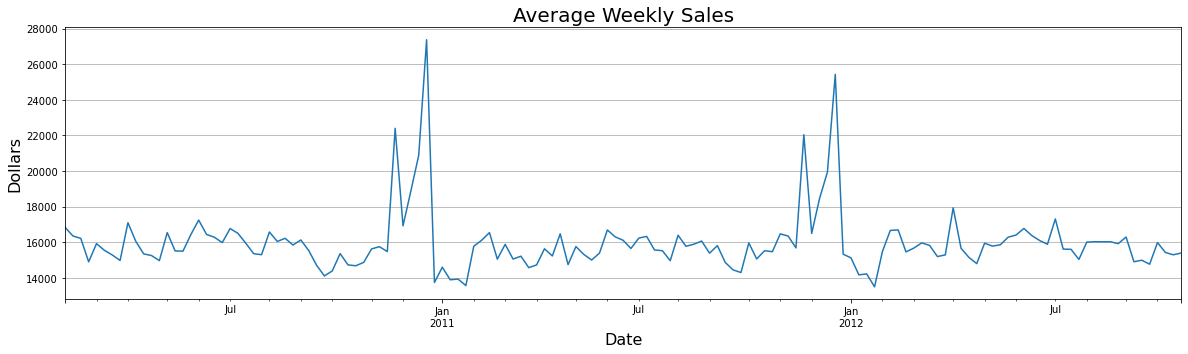

In [29]:
# Now you try!
# Enter your solution for Q5, Part 2

# Draw a line graph showing Weekly Sales over time. Not very pretty, is it?
# Confusing too since the only way to get the 'Date' column to act as the x-axis is to use the use_index=True parameter
# We can use the `figzise` parameter in `plot` to make the graph bigger.
# This is ok... but we have several points for every Week (one per store/department), which is skewing our plot.
# How might you improve on this?
training_df.groupby('Date')['Weekly_Sales'].mean().plot(use_index = True,y=['Weekly_Sales'], figsize = (20,5))
plt.grid(axis = 'y')
plt.title("Average Weekly Sales", fontsize = 20)
plt.xlabel("Date", fontsize = 16)
plt.ylabel("Dollars", fontsize = 16)

Text(0, 0.5, 'Dollars (hundreds of millions)')

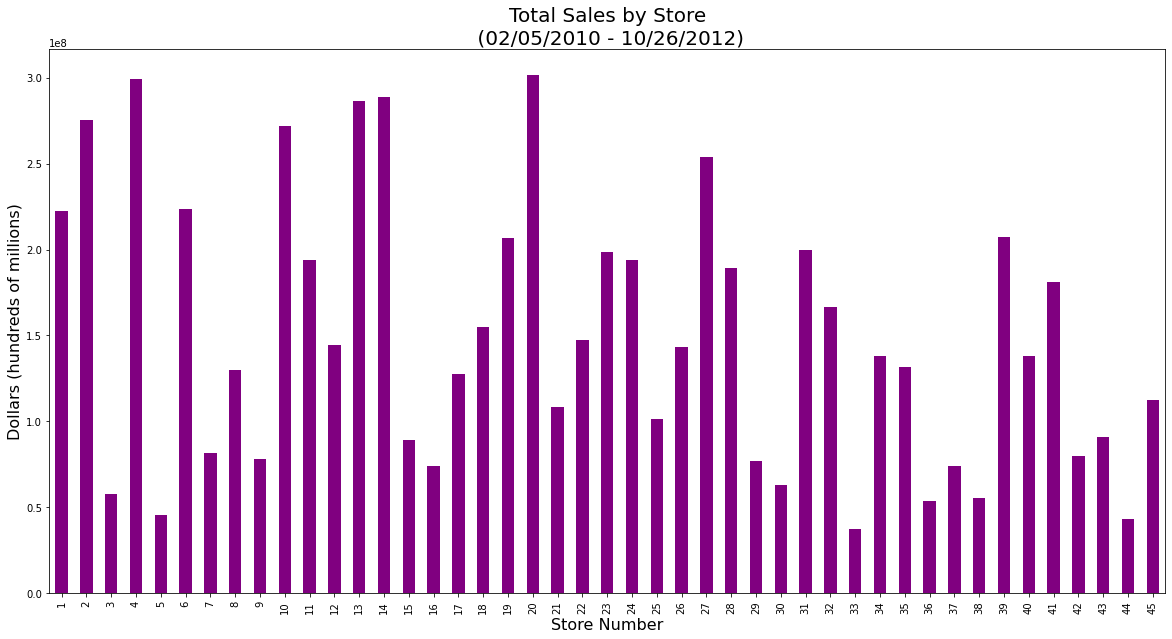

In [30]:
# Now you try!
# Enter your solution for Q5, Part 3
# Show the distribution of Weekly Sales over all Stores

# Group the data by Store and plot total sales for the full period from 2/5/10 to 10/26/12
training_df.groupby('Store')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'purple', figsize = (20,10))
plt.title("Total Sales by Store\n (02/05/2010 - 10/26/2012)", fontsize = 20)
plt.xlabel("Store Number", fontsize = 16)
plt.ylabel("Dollars (hundreds of millions)", fontsize = 16)


Text(0, 0.5, 'Dollars (hundreds of millions)')

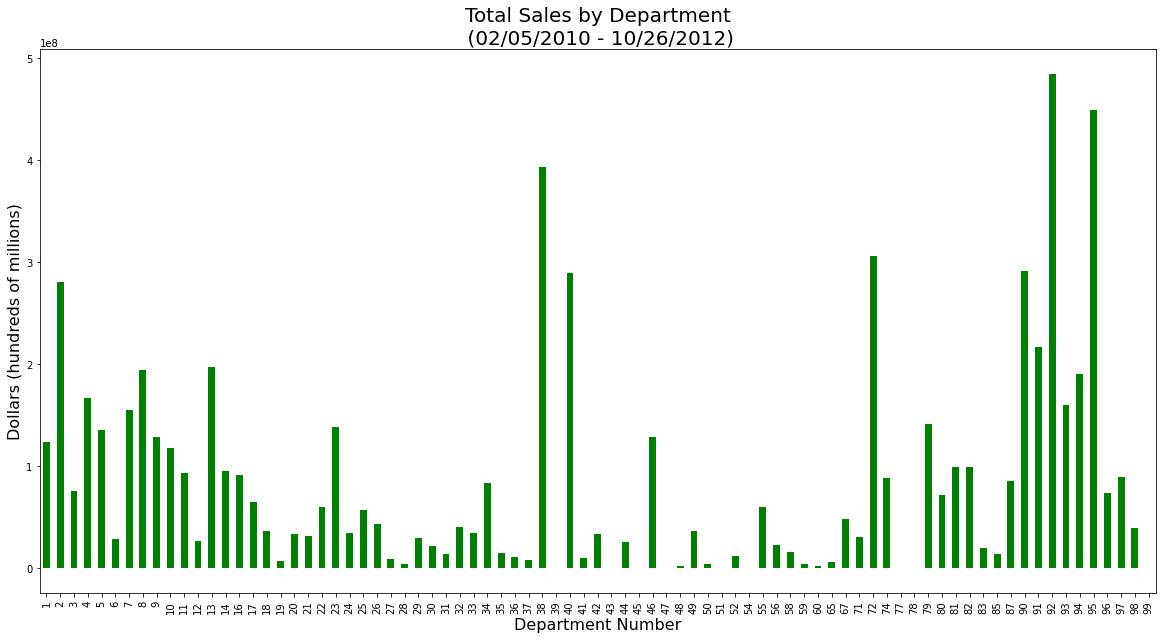

In [31]:
# Show the distribution of Weekly Sales over all Departments

# Group the data by Dept and plot total sales for the full period from 2/5/10 to 10/26/12
training_df.groupby('Dept')['Weekly_Sales'].sum().plot(kind = 'bar', color = 'g', figsize=(20,10))
plt.title("Total Sales by Department\n (02/05/2010 - 10/26/2012)", fontsize = 20)
plt.xlabel("Department Number", fontsize = 16)
plt.ylabel("Dollars (hundreds of millions)", fontsize = 16)

Text(0, 0.5, 'Dollars (billions)')

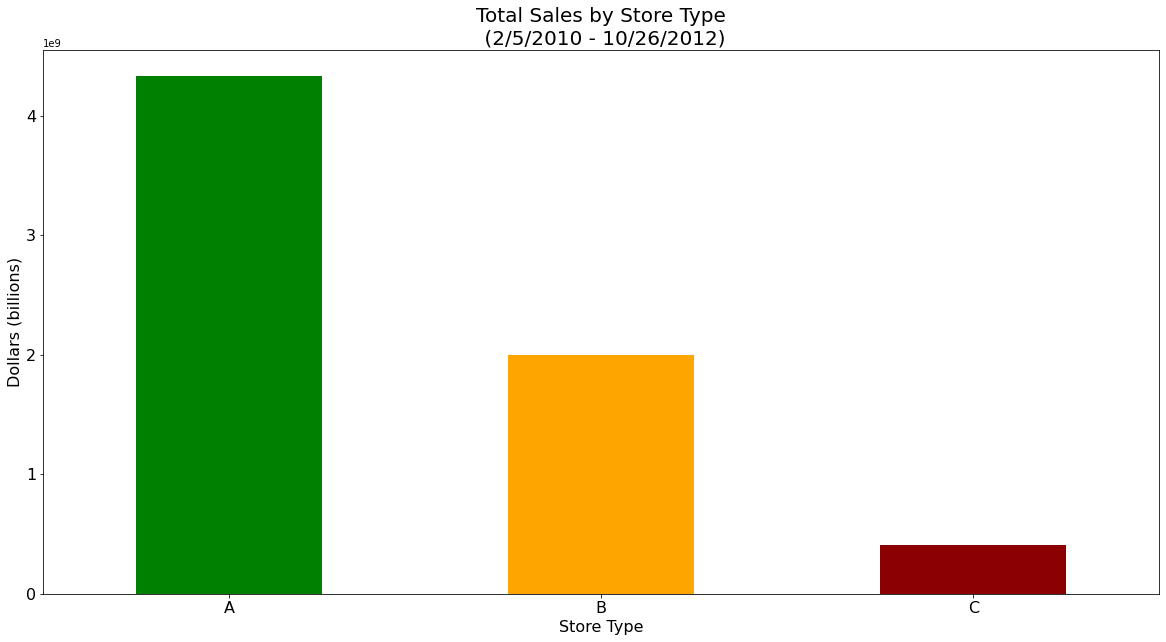

In [32]:
# Now you try!
# Enter your solution for Q5, Part 4
# Show the distribution of Weekly Sales grouped by the different types
training_df.groupby('Type')['Weekly_Sales'].sum().plot(kind = 'bar', figsize = (20,10), rot='horizontal',
                                                      color = ['green', 'orange', 'darkred'], fontsize = 16)
plt.title("Total Sales by Store Type\n (2/5/2010 - 10/26/2012)", fontsize = 20)
plt.xlabel("Store Type", fontsize = 16)
plt.ylabel("Dollars (billions)", fontsize = 16)

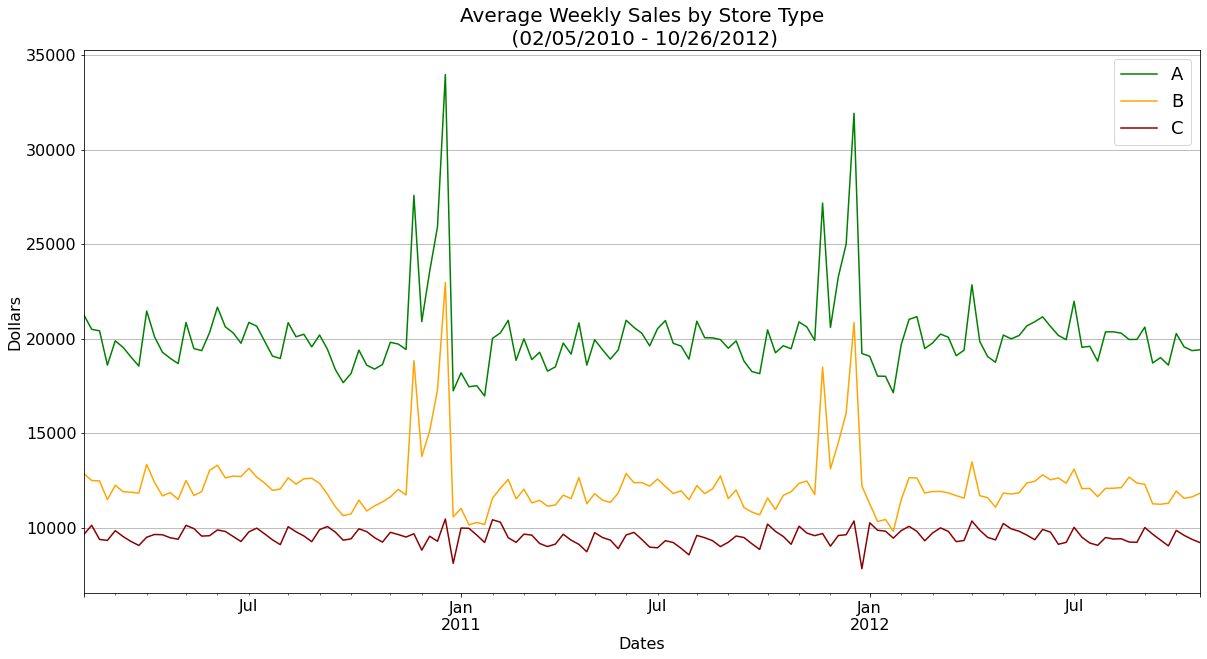

In [33]:
# Now you try!
# Enter your solution for Q5, Part 5
# Based on graph 4, determine which type of store seems to have lower weekly sales compared to the other two?
#    Answer: Store Type C appears to have lower weekly sales compared to the other two stores.

# Demonstrate that this is true by plotting the average sales over time for each type of store.
training_df.groupby(['Date','Type'])['Weekly_Sales'].mean().unstack().plot(kind = 'line', use_index = True, 
                                                    figsize = (20,10), color = ['green', 'orange', 'darkred'],
                                                    fontsize = 16)
plt.title('Average Weekly Sales by Store Type\n (02/05/2010 - 10/26/2012)', fontsize = 20)
plt.xlabel('Dates', fontsize = 16)
plt.ylabel('Dollars', fontsize = 16)
plt.grid(axis = 'y')
plt.legend(fontsize = 18, loc = 'best')

---

## Question 6

Next, try plotting `Weekly sales` from the beginning of August through December of 2010, grouped by store type.

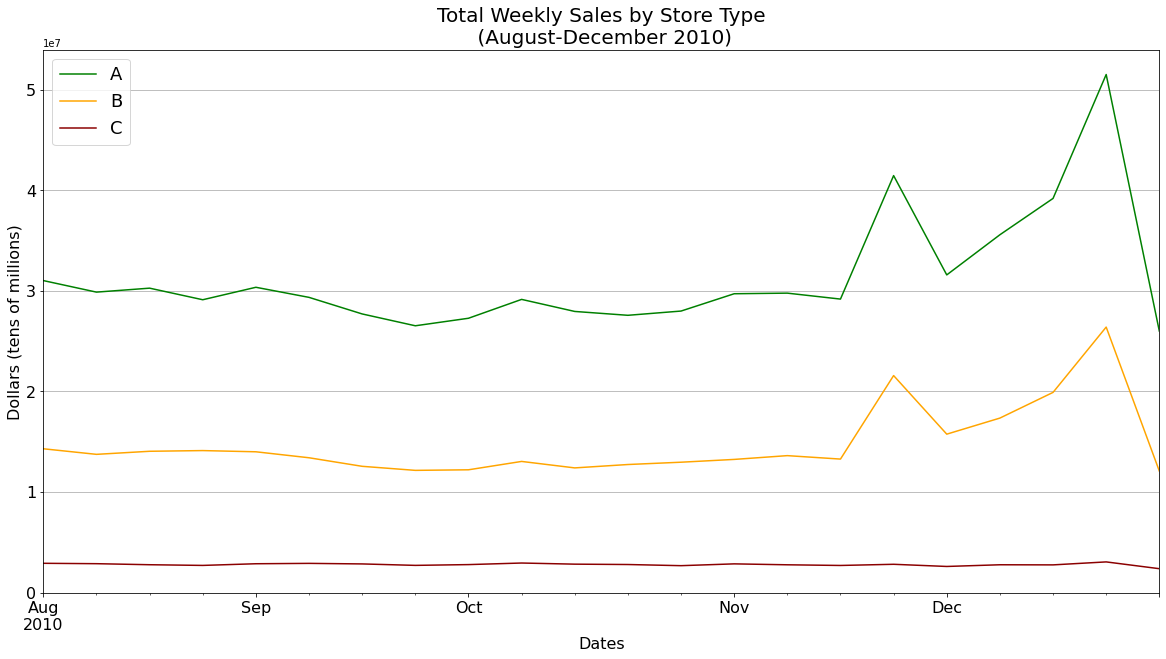

In [34]:
# Now you try!
# Enter your solution for Q6

# Plot Weekly_Sales totals from August to December 2010 grouped by store type.
training_df['2010-08':'2010-12'].groupby(['Date','Type'])['Weekly_Sales'].sum().unstack().plot(kind = 'line', use_index = True, 
                                                    figsize = (20,10), color = ['green', 'orange', 'darkred'],
                                                    fontsize = 16)
plt.title('Total Weekly Sales by Store Type\n (August-December 2010)', fontsize = 20)
plt.xlabel('Dates', fontsize = 16)
plt.ylabel('Dollars (tens of millions)', fontsize = 16)
plt.grid(axis = 'y')
plt.legend(fontsize = 18, loc = 'best')

---

## Tutorial: Regression Analysis
Now that we've learned how to slice and bin data with Pandas, let's try some [**regression analysis**](https://www.investopedia.com/articles/financial-theory/09/regression-analysis-basics-business.asp), shall we? We'll begin with a brief refresher:


### Estimating ("Learning") Model Coefficients

- **Coefficients** are estimated during the "model fitting" process using the [**least squares criterion**](https://www.investopedia.com/terms/l/least-squares.asp).
- Our goal is to find the line (mathematically) which minimizes the [**sum of squared residuals**](https://www.investopedia.com/terms/s/sum-of-squares.asp) (or "sum of squared errors").

![Estimating coefficients](images/estimating_coefficients.png)

In this diagram:

- The black dots are the **observed values** of x and y.
- The blue line is our [**least squares line**](https://www.investopedia.com/terms/l/line-of-best-fit.asp).
- The red lines are the [**residuals**](https://www.investopedia.com/terms/r/residual-standard-deviation.asp), which are the *distances between the observed values and the least squares line*.

![Slope-intercept](images/slope_intercept.png)

How do the model coefficients relate to the least squares line?

- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)


Linear Regression is highly **parametric**, meaning that is relies heavily on the underlying shape of the data. If the data fall into a line, then linear regression will perform well. If the data does **not** fall in line (get it?), then running a linear regression is likely to fail.


Let's try estimating the model coefficients for our Walmart data using the [**`statsmodels` library**](https://www.statsmodels.org/stable/index.html).


In [35]:
### STATSMODELS ###

# Let's import statsmodels and get started!
import statsmodels.formula.api as smf


# Now we'll create a fitted model
lm = smf.ols(formula='Weekly_Sales ~ Fuel_Price', data=training_df).fit()

# Print the coefficients
lm.params

Intercept     16001.284766
Fuel_Price       -5.958490
dtype: float64


### Interpreting model coefficients

How do we interpret the CPI coefficient ($\beta_1$)?

- A "unit" increase in `Fuel_Price` is **associated with** a 5.96 "unit" decrease in Sales.
- This is not a statement of **causation**.

If an increase in `Fuel_Price` was associated with a **increase** in sales, $\beta_1$ would be **positive**.


### Confidence intervals

Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which the sample was drawn was **sampled 100 times**, approximately **95 of those confidence intervals** would contain the "true" coefficient.

- Note: we only have a **single sample of data** and not the **entire population of data**.
- The "true" coefficient is either within this interval or it isn't, but there's no way to actually know!
- Therefore, we estimate the coefficient with the data we have and we calculate our uncertainty about that estimate by giving a range that the coefficient **probably** falls within.

> For an [additional refresher on confidence intervals, click here](https://www.investopedia.com/terms/c/confidenceinterval.asp) or [check the following thread](http://www.quora.com/What-is-a-confidence-interval-in-laymans-terms/answer/Michael-Hochster).

Note: **95%** confidence intervals are just a common convention. You could also create **90%** confidence intervals (which would be more narrow), 99% confidence intervals (which would be wider), or whatever other intervals you like!

> A closely related concept is **[hypothesis testing](https://www.investopedia.com/terms/h/hypothesistesting.asp)**; [see the following thread](https://www.quora.com/How-do-you-explain-hypothesis-testing-to-a-layman)**.

In [36]:
### STATSMODELS ###

# Print the confidence intervals for the model coefficients:
lm.conf_int()

,0,1
Intercept,15494.085966,16508.483566
Fuel_Price,-155.479483,143.562503


---

### Hypothesis testing and p-values

The general process for [hypothesis testing](https://www.investopedia.com/terms/h/hypothesistesting.asp) is:

- Start with a **[null hypothesis](https://www.investopedia.com/terms/n/null_hypothesis.asp)** and an **alternative hypothesis** (something that is the opposite of the null).
- Check whether the data supports **rejecting the null hypothesis** or **failing to reject the null hypothesis**.

For model coefficients, here is a "conventional" hypothesis test:

- **null hypothesis:** There _is no_ relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- **alternative hypothesis:** There _is_ a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis?

- The **[p-value](https://www.investopedia.com/terms/p/p-value.asp)** is the probability that the relationship we are observing is occurring purely by chance.
- If the 95% confidence interval for a coefficient **does not include zero**, the p-value will be **less than 0.05**, and we will reject the null (and thus believe the alternative).
- If the 95% confidence interval **includes zero**, the p-value will be **greater than 0.05**, and we will fail to reject the null.

In [37]:
### STATSMODELS ###

# Let's set P-values for the model coefficients. If we just use Fuel Price as our signal, then our p value will be very high!
lm.pvalues

Intercept     0.000000
Fuel_Price    0.937744
dtype: float64

---

## Question 7

Run a simple regression analysis using "CPI" as the only signal. According to your analysis, is CPI positively or negatively associated with sales?

In [38]:
# Now you try!
# Enter your solution for Q7

# Now we'll create a fitted model
lmCPI = smf.ols(formula='Weekly_Sales ~ CPI', data=training_df).fit()

# Print the coefficients
lmCPI.params



Intercept    18058.577233
CPI            -12.133735
dtype: float64

In [39]:
lmCPI.conf_int()

,0,1
Intercept,17751.174474,18365.979993
CPI,-13.884088,-10.383383


In [40]:
lmCPI.pvalues

Intercept    0.000000e+00
CPI          4.892587e-42
dtype: float64

#### ANSWER:
Based on the CPI coefficient result of -12.133735, there is a negative relationship between weekly sales and CPI in which every unit increase in CPI is associated with a 12.133735 decrease in sales.

The CPI coefficient confidence interval = 71.15%

The CPI pvalue that the relationship between CPI and sales is occurring purely by chance is less 0.01%. Therefore there is a 99.9% chance the observed relationship between CPI and sales exists. 